In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

In [5]:
def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

In [6]:
def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

In [7]:
def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

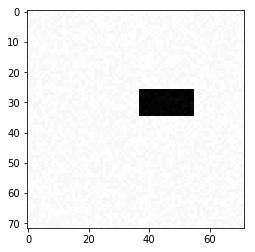

In [8]:
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(72,72), cmap='gray')

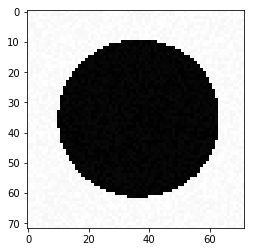

In [9]:
im = generate_a_disk(10)
plt.imshow(im.reshape(72,72), cmap='gray')

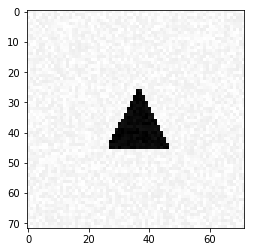

In [10]:
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(72,72), cmap='gray')

In [11]:
def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [12]:
def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

In [13]:
def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [14]:

import matplotlib.patches as patches

In [15]:
def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

In [16]:
def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

# 2. Simple Classification

Build and train a linear classifier in Keras to classify a image into one of the three possible categories ((i.e. rectangle, disk, triangle).

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils

/Users/noemiequere/anaconda/envs/py27/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [19]:
#Input data
print (X_train.shape)
ncols = X_train.shape[1]

(300, 5184)
(300, 5184)


In [20]:
#Reformatting output data
print(Y_train.shape)

Y_train = np_utils.to_categorical(Y_train, 3) 
print(Y_train[0])

(300,)
[0. 0. 1.]
(300, 3)


In [21]:
#Create the model
model_0 = Sequential()

#Add 1 hidden layer
#model_0.add(Dense(32, activation='relu', input_shape=(5184,)))

#Add output layers
model_0.add(Dense(3, activation='softmax', input_shape=(5184,)))

### with SGD optimizer

In [22]:
##Compile model with SGD
sgd = SGD(lr=0.01)

model_0.compile(optimizer=sgd,loss='mean_squared_error', metrics=['accuracy']) 

In [23]:
#Fit the model
model_0.fit(X_train, Y_train, epochs=10, validation_split=0.3)

Train on 210 samples, validate on 90 samples
Epoch 1/10
210/210 [==============================] - 0s 2ms/step - loss: 0.3060 - acc: 0.3524 - val_loss: 0.3481 - val_acc: 0.4333
Epoch 2/10
210/210 [==============================] - 0s 161us/step - loss: 0.2905 - acc: 0.4571 - val_loss: 0.4524 - val_acc: 0.2222
Epoch 3/10
210/210 [==============================] - 0s 155us/step - loss: 0.3174 - acc: 0.4238 - val_loss: 0.3528 - val_acc: 0.3444
Epoch 4/10
210/210 [==============================] - 0s 136us/step - loss: 0.2056 - acc: 0.5619 - val_loss: 0.1780 - val_acc: 0.4778
Epoch 5/10
210/210 [==============================] - 0s 167us/step - loss: 0.1765 - acc: 0.6000 - val_loss: 0.2425 - val_acc: 0.4333
Epoch 6/10
210/210 [==============================] - 0s 131us/step - loss: 0.2741 - acc: 0.4095 - val_loss: 0.2411 - val_acc: 0.4222
Epoch 7/10
210/210 [==============================] - 0s 152us/step - loss: 0.1811 - acc: 0.5810 - val_loss: 0.2217 - val_acc: 0.6556
Epoch 8/10
210/210 

In [24]:
#Testing

X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model_0.predict(X_test)

array([[1.000000e+00, 7.285741e-24, 0.000000e+00]], dtype=float32)

### Adam optimizer

In [25]:
#Generate a new model, unnafected by the previous result
model_1 = Sequential()
#model_1.add(Dense(32, activation='relu', input_shape=(5184,)))
model_1.add(Dense(3, activation='softmax', input_shape=(5184,)))

In [26]:
#Compile model with Adam optimizer
model_1.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

#Fit model
model_1.fit(X_train, Y_train, batch_size=10, epochs=20, verbose=1) 

Epoch 1/20
300/300 [==============================] - 1s 2ms/step - loss: 1.5075 - acc: 0.5067
Epoch 2/20
300/300 [==============================] - 0s 277us/step - loss: 0.7517 - acc: 0.6933
Epoch 3/20
300/300 [==============================] - 0s 291us/step - loss: 0.5548 - acc: 0.7467
Epoch 4/20
300/300 [==============================] - 0s 299us/step - loss: 0.2735 - acc: 0.8900
Epoch 5/20
300/300 [==============================] - 0s 288us/step - loss: 0.2311 - acc: 0.9100
Epoch 6/20
300/300 [==============================] - 0s 286us/step - loss: 0.1501 - acc: 0.9800
Epoch 7/20
300/300 [==============================] - 0s 290us/step - loss: 0.1267 - acc: 0.9967
Epoch 8/20
300/300 [==============================] - 0s 288us/step - loss: 0.1081 - acc: 0.9933
Epoch 9/20
300/300 [==============================] - 0s 282us/step - loss: 0.1000 - acc: 0.9967
Epoch 10/20
300/300 [==============================] - 0s 269us/step - loss: 0.0886 - acc: 0.9967
Epoch 11/20
300/300 [==========

In [27]:
#Classifier testing

X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model_1.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

## 3. Visualization of the solution

In [28]:
model_0.get_weights()

[array([[-0.02588248, -0.01523721, -0.02544599],
        [ 0.01069626,  0.02294583,  0.02339281],
        [ 0.01622964, -0.01834766,  0.01466858],
        ...,
        [ 0.00273527,  0.02787034, -0.02248654],
        [-0.01432748,  0.01120843, -0.0308338 ],
        [ 0.02545821, -0.00472411, -0.00049415]], dtype=float32),
 array([ 0.00057923,  0.00013529, -0.00071452], dtype=float32)]

In [29]:
model_1.get_weights()

[array([[ 0.03458533,  0.00638779, -0.01729579],
        [ 0.00792164,  0.01555133,  0.00526153],
        [ 0.00343681,  0.00555512,  0.00520396],
        ...,
        [-0.00744301,  0.00606096,  0.02803691],
        [-0.00173919, -0.02080685,  0.01836958],
        [-0.01784267, -0.01828857, -0.00580694]], dtype=float32),
 array([ 0.00213266,  0.00028755, -0.00119713], dtype=float32)]

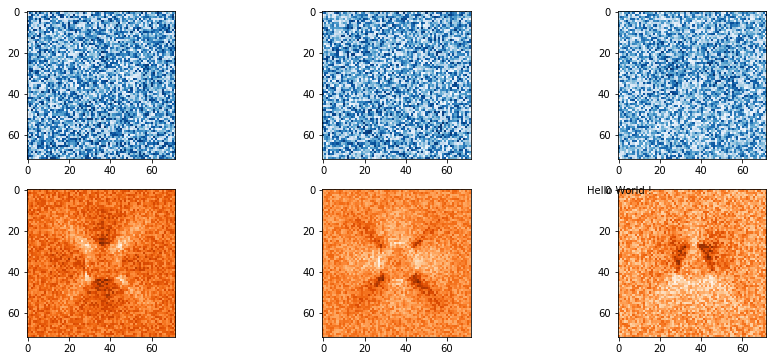

In [36]:
im_size = 72
wgt_SGD = np.array(model_0.get_weights()[0])
wgt_adam = np.array(model_1.get_weights()[0])

f, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols=3, figsize=(15,6), facecolor='w', edgecolor='k')

for i in range(3):
    ax1[i].imshow(wgt_SGD[:,i].reshape(im_size,im_size), cmap='Blues')
    ax2[i].imshow(wgt_adam[:,i].reshape(im_size,im_size), cmap='Oranges')

# 4. A more difficult classification problem

In [ ]:
#Generate new training set
[X_train, Y_train] = generate_dataset_classification(300, 20, True)

In [ ]:
[X_test, Y_test] = generate_test_set_classification()

In [ ]:
print (X_train.shape)
X_train = np.array([x.reshape(72,72) for x in X_train])
X_test = np.array([x.reshape(72,72) for x in X_test])

X_train = X_train.reshape(X_train.shape[0], 72,72, 1)
X_test = X_test.reshape(X_test.shape[0], 72,72, 1)

In [ ]:
#Reformatting output data
print(Y_train.shape)

Y_train = np_utils.to_categorical(Y_train, 3) 
print(Y_train[0])
print(Y_train.shape)

In [ ]:
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping

In [ ]:
#Building a new linear classifier
model_2 = Sequential()

#Adding 1 pooling layer with a dropout of a 0.25 rate to prevent overfitting
model_2.add(Conv2D(16,(5,5), activation='relu', input_shape=(72, 72, 1)))
model_2.add(MaxPooling2D(pool_size=(5)))
model_2.add(Dropout(0.25))

#Adding 1 fully connected layer
model_2.add(Flatten())
model_2.add(Dense(16, activation='relu'))

#Adding the output layer
model_2.add(Dropout(0.5))
model_2.add(Dense(3, activation='softmax'))


In [ ]:
#Compile the model

early_stopping_monitor = EarlyStopping(patience=3)

model_2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
model_2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, callbacks=[early_stopping_monitor])

In [ ]:
model_2.evaluate(X_test, Y_test)

## 5. A Regression Problem 

In [ ]:
[X_train, Y_train] = generate_dataset_regression(300, 20)

In [ ]:
visualize_prediction(X_train[0], Y_train[0])

In [ ]:
[X_test, Y_test] = generate_test_set_regression()

In [ ]:
print (X_train.shape)
X_train = np.array([x.reshape(72,72) for x in X_train])
X_test = np.array([x.reshape(72,72) for x in X_test])

X_train = X_train.reshape(X_train.shape[0], 72,72, 1)
X_test = X_test.reshape(X_test.shape[0], 72,72, 1)
print (X_train.shape)

In [ ]:
print(Y_train.shape)
print(Y_train[0])
Y_train = np_utils.to_categorical(Y_train, 3) 

print(Y_train.shape)
print(Y_train[0])

In [ ]:
#Normalize Data
Y_train = np.array(Y_train, dtype=np.float32)
m = Y_train.mean()
s = Y_train.std()
Y_train -= m
Y_train /= s

#Y_test = np_utils.to_categorical(Y_test, 6) 
Y_test = np.array(Y_test, dtype=np.float32)
mt = Y_test.mean()
st = Y_test.std()
Y_test -= mt
Y_test /= st

In [ ]:
print('Y_train:', Y_train.shape)
print(Y_train.shape[0], 'train samples')
#print(Y_train[0])
print('Y_test:', Y_test.shape)
print(Y_test.shape[0], 'test samples')
#print(Y_test[0])
 

In [ ]:
#Building a new linear classifier
model_3 = Sequential()

#Adding 1 pooling layer with a dropout of a 0.25 rate to prevent overfitting
model_3.add(Conv2D(16,(5,5), activation='relu', input_shape=(72, 72,1 )))
model_3.add(MaxPooling2D(pool_size=(5)))
model_3.add(Dropout(0.25))

#Adding 1 fully connected layer
#model_3.add(Flatten())
model_3.add(Dense(16, activation='relu'))

#Adding the output layer
model_3.add(Dropout(0.5))
model_3.add(Dense(6, activation='linear'))

In [ ]:
print(model_3.output_shape) 

In [ ]:
#Compile the model

early_stopping_monitor = EarlyStopping(patience=3)

model_3.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

#Fit model
model_3.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, callbacks=[early_stopping_monitor])